## **Importing Libraries**

A library was built with the name tfqml.py to store all the dependencies, classes and methods that are used in this work, these classes are
- ClassicalPreprocessing,

together with the methods 
- visualization and 
- save_data


the dependencies are:
- numpy 
- pandas 
- matplotlib
- sklearn
- tensorflow

In [1]:
from tfqml import *

2022-02-25 10:27:19.873239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 10:27:19.873275: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-25 10:27:21.219740: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-25 10:27:21.219765: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (toto): /proc/driver/nvidia/version does not exist
2022-02-25 10:27:21.220027: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To en

## **Choose the 8 stocks**

we select 8 stocks from 8 conglomerates based on the dataset of Xu et al. [[2]](https://aclanthology.org/P18-1183/): 

- Basic Materials: TOTAL S.A. "TOT"

- Consumer Goods: Appel Inc. "AAPL"

- Healthcare: AbbVie Inc. "ABBV"

- Services: Wall-Mart Stores Inc. "WMT"

- Utilites: Duke energy corporation "DUK"

- Financial: HSBS Holding pcl "HSBC"

- Industrial Goods: ABB Ltd. "ABB"

- Technology: China Mobile Limited "CHL"

In [2]:
name_stocks = ['AAPL','ABB','ABBV','TOT','WMT','DUK','CHL','HSBC']

# Classical Preprocessing

The methods of our library are used to preprocess the csv files of the 8 stocks,
We consider 30 days por each instance and we obtain the shape of the train and test dataset

In [3]:
cp = ClassicalPreprocessing(filename=name_stocks[0])
days = 30
x_train,y_train,x_test,y_test = cp.preprocessing(days=days,flag_pca=True)

Shape of train data: (880, 1)
Shape of test data: (378, 1)


At this point we can check the dataset for trai nand test and confirm is the same dimention of the days and using a normalization

In [4]:
x_train[0]

array([0.50210573, 0.5198373 , 0.5154993 , 0.52431991, 0.52865792,
       0.50093085, 0.50407582, 0.52309078, 0.54584719, 0.56281965,
       0.56377762, 0.56446444, 0.56247619, 0.56835058, 0.54024395,
       0.54277451, 0.50749205, 0.49944871, 0.52558515, 0.51186616,
       0.49496611, 0.50047898, 0.51202891, 0.5010935 , 0.46798009,
       0.45310439, 0.45507448, 0.46729319, 0.43667413, 0.44171711])

Creating our LSTM  model.The first layer is our proposal which input is 30 parameters per instance, followed by LSTM and Dropout layers, at the end a Dense layer to have an output value.

In [7]:
# Build the Keras model.
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=5),
    tf.keras.layers.Dense(units=1),
])


Is important consier the prpeorcessing the initial dataset

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Apply the as loss the MSE and optimizer ADAM

In [9]:
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 100)           40800     
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_3 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_4 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 5)                

Consider only 60 epoch with a batch size of 32

In [10]:
qnn_history = model.fit(
      x_train, y_train,
      batch_size=32,
      epochs=60)

qnn_results = model.evaluate(x_test, y_test)


Epoch 1/60
27/27 [==============================] - 7s 74ms/step - loss: 0.0328 - root_mean_squared_error: 0.1811
Epoch 2/60
27/27 [==============================] - 2s 69ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686
Epoch 3/60
27/27 [==============================] - 2s 63ms/step - loss: 0.0039 - root_mean_squared_error: 0.0622
Epoch 4/60
27/27 [==============================] - 2s 58ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586
Epoch 5/60
27/27 [==============================] - 2s 65ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576
Epoch 6/60
27/27 [==============================] - 2s 70ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583
Epoch 7/60
27/27 [==============================] - 2s 59ms/step - loss: 0.0030 - root_mean_squared_error: 0.0544
Epoch 8/60
27/27 [==============================] - 2s 60ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 9/60
27/27 [==============================] - 2s 56ms/step - loss: 0.0030 - root_m

Plot the result between the  real and predict with both data set, train and test.

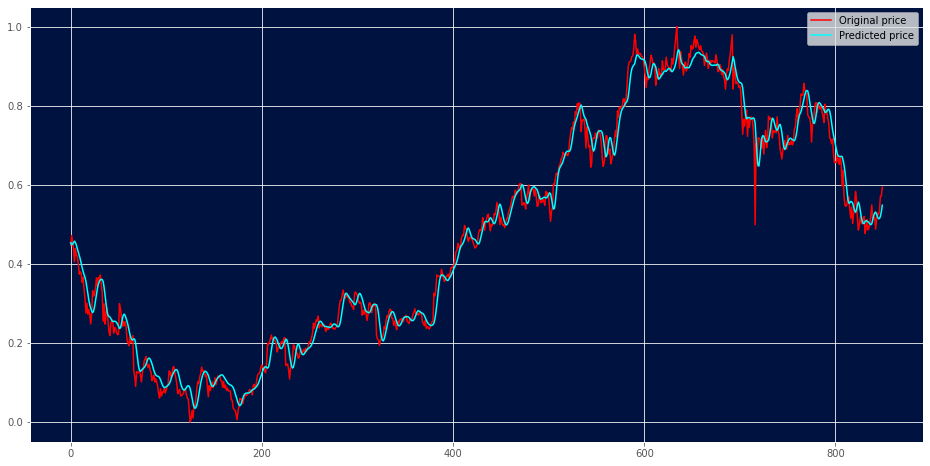

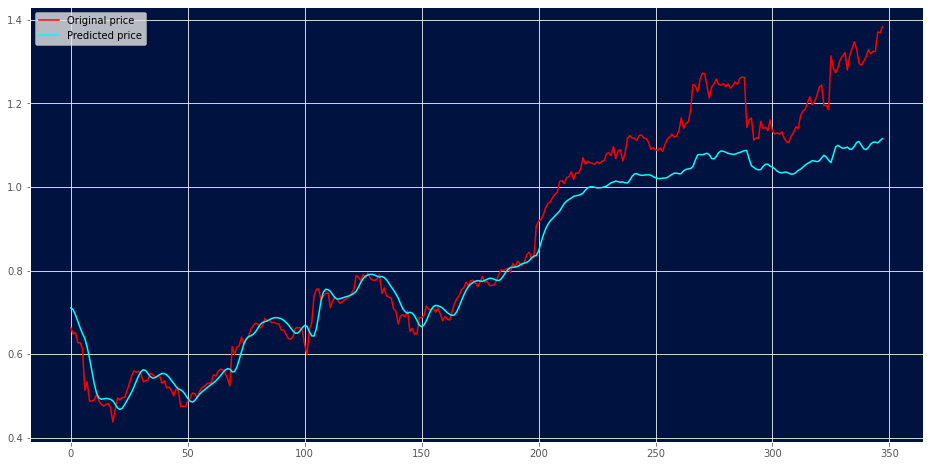

In [11]:
visualization(model,x_train,y_train)
visualization(model,x_test,y_test)

Finally, we save the model and outputs, the proposal save this model.

In [ ]:
save_data(model,x_train,y_train,name_stocks[1]+"_train")
save_data(model,x_test,y_test,name_stocks[1]+"_test")